<a href="https://colab.research.google.com/github/eflores5000/estrategia2/blob/main/Trabajo_final_v1_RN_mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

1. Carga del conjunto de datos

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [2]:
#%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()
#uploaded = files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eduflowers","key":"8cf8eb7e9d3d4d836fe29bda7df108d9"}'}

In [9]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [22]:
# AHORA SI: Descarguemos un dataset de cierta competición
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("ifigotin/imagenetmini-1000")

path = kagglehub.dataset_download("ambityga/imagenet100")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imagenet100


In [56]:
from google.colab import drive
import shutil
import os

# 1. Montar Google Drive (descomenta si es necesario)
#drive.mount('/content/drive')

# 2. Definir rutas
origen = '/kaggle/input/imagenet100/val.X'
destino = '/content/drive/MyDrive/Colab Notebooks/imagenet100/val.X'

# 3. Copiar TODO el árbol de directorios (sobrescribiendo si existe)
try:
    shutil.copytree(origen, destino, dirs_exist_ok=True)  # ¡Clave para evitar FileExistsError!
    print(f"¡Copia completada! Directorios copiados a: {destino}")
except Exception as e:
    print(f"Error inesperado: {str(e)}")


¡Copia completada! Directorios copiados a: /content/drive/MyDrive/Colab Notebooks/imagenet100/val.X


In [44]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

mkdir: cannot create directory ‘my_dataset’: File exists


In [17]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/kaggle/drive/', force_remount=True)

Mounted at /content/drive


2. Inspección del conjunto de datos

/content/drive/MyDrive/Colab Notebooks/imagenet100/train/n01440764/n01440764_10043.JPEG


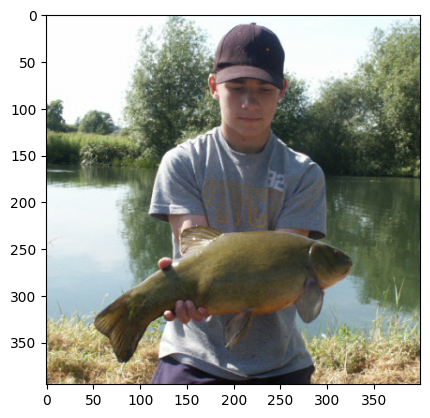

In [48]:
# Mostrar un elemento del dataset
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/imagenet100/train/n01440764/"
import matplotlib.pyplot as plt
import numpy as np
import cv2

#idx = np.random.randint(1, 1000)
#img = cv2.imread('test/' + str(idx) + '.jpg', cv2.COLOR_BGR2RGB)
nombre = BASE_FOLDER+'n01440764_' + '10043' + '.JPEG'
print(nombre)
img = cv2.imread(nombre, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[INFO]: Clases disponibles: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01531178', 'n01537544', 'n01560419', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01622779', 'n01630670', 'n01632458', 'n01632777', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01675722', 'n01677366', 'n01685808', 'n01687978', 'n01693334', 'n01695060', 'n01698640', 'n01728572', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01739381', 'n01740131', 'n01742172', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n01774384', 'n01774750', 'n01775062', 'n01776313', 'n01795545', 'n01796340', 'n01798484', 'n01806143', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413', 'n01833805', 'n01843383', 'n01847000', 'n01855672', 'n01860187', 'n01877812', 'n01883070', 'n01910747', 'n01914609', 'n0192491

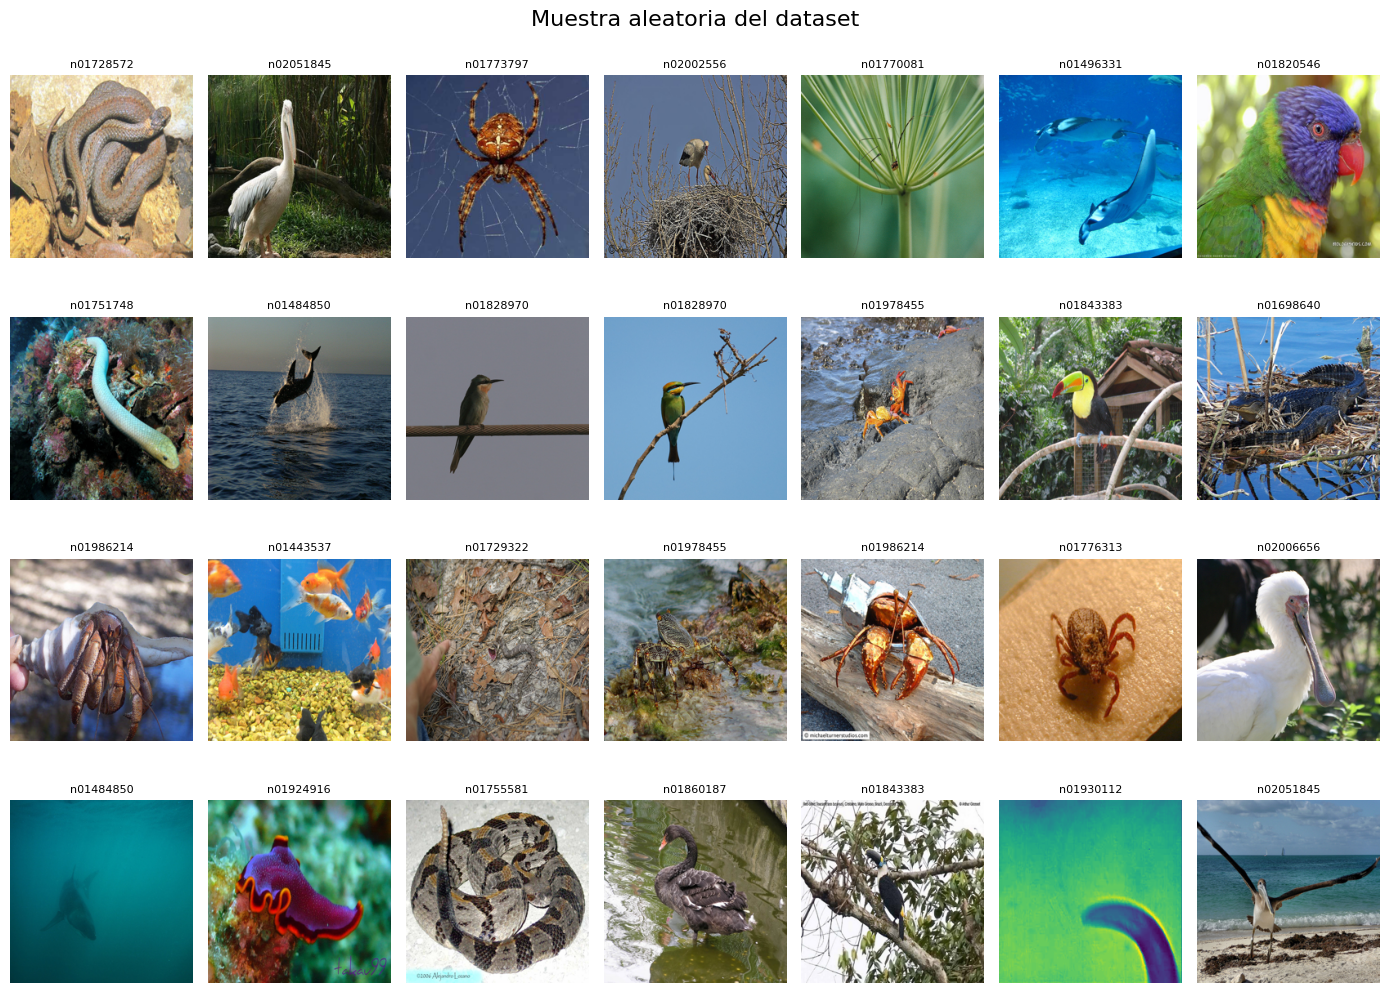

In [49]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Ruta al dataset de entrenamiento
train_path = '/content/drive/MyDrive/Colab Notebooks/imagenet100/train'

# Obtener solo carpetas (clases) válidas
clases = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
print(f"[INFO]: Clases disponibles: {clases}")

# Preparar lista de (imagen, etiqueta)
ejemplos = []
for clase in clases:
    ruta_clase = os.path.join(train_path, clase)
    imagenes = [f for f in os.listdir(ruta_clase) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for img in imagenes:
        ejemplos.append((os.path.join(ruta_clase, img), clase))

# Seleccionar aleatoriamente 28 imágenes
muestras = random.sample(ejemplos, 28)

# Visualización tipo CIFAR-10
fig = plt.figure(figsize=(14, 10))
for i, (ruta_img, etiqueta) in enumerate(muestras):
    fig.add_subplot(4, 7, i+1)
    img = Image.open(ruta_img).resize((224, 224))
    plt.imshow(img)
    plt.title(etiqueta, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Muestra aleatoria del dataset", fontsize=16, y=1.02)
plt.show()

3. Acondicionamiento del conjunto de datos

In [76]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hiperparámetros
BATCH_SIZE = 64
initial_learning_rate = 0.001
fine_tune_learning_rate = 0.001
initial_epochs = 10
fine_tune_epochs = 10
input_shape = (224, 224, 3)

# Rutas
dataset_train = "/content/drive/MyDrive/Colab Notebooks/imagenet100/train"
dataset_val   = "/content/drive/MyDrive/Colab Notebooks/imagenet100/val.X"

4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

In [77]:
# 1. Preprocesamiento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_train,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    dataset_val,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Detectamos automáticamente el número de clases
num_classes = train_generator.num_classes
print(f"✅ Número de clases detectado: {num_classes}")

# 2. Construcción del modelo usando Transfer Learning con MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

# Congelamos la base para entrenamiento inicial
base_model.trainable = False

# Creamos cabeza del modelo minimalista
inputs = layers.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)   # Solo una capa intermedia pequeña
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Definimos el modelo final
model = models.Model(inputs=inputs, outputs=outputs)

# 3. Compilación
model.compile(
    optimizer=optimizers.Adam(learning_rate=initial_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 4. Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint('best_mobilenetv2_model.h5', monitor='val_accuracy', save_best_only=True)
]

model.save('final_mobilenetv2_model.h5')
print("✅ Modelo guardado como 'final_mobilenetv2_model.h5'.")


Found 130000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.
✅ Número de clases detectado: 100


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,611,620 (9.96 MB)

 Trainable params: 353,636 (1.35 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

✅ Modelo guardado como 'final_mobilenetv2_model.h5'.


In [72]:
print(train_generator.class_indices)
print(val_generator.class_indices)


{'n01440764': 0, 'n01443537': 1, 'n01484850': 2, 'n01491361': 3, 'n01494475': 4, 'n01496331': 5, 'n01498041': 6, 'n01514668': 7, 'n01514859': 8, 'n01531178': 9, 'n01537544': 10, 'n01560419': 11, 'n01582220': 12, 'n01592084': 13, 'n01601694': 14, 'n01608432': 15, 'n01614925': 16, 'n01622779': 17, 'n01630670': 18, 'n01632458': 19, 'n01632777': 20, 'n01644900': 21, 'n01664065': 22, 'n01665541': 23, 'n01667114': 24, 'n01667778': 25, 'n01675722': 26, 'n01677366': 27, 'n01685808': 28, 'n01687978': 29, 'n01693334': 30, 'n01695060': 31, 'n01698640': 32, 'n01728572': 33, 'n01729322': 34, 'n01729977': 35, 'n01734418': 36, 'n01735189': 37, 'n01739381': 38, 'n01740131': 39, 'n01742172': 40, 'n01749939': 41, 'n01751748': 42, 'n01753488': 43, 'n01755581': 44, 'n01756291': 45, 'n01770081': 46, 'n01770393': 47, 'n01773157': 48, 'n01773549': 49, 'n01773797': 50, 'n01774384': 51, 'n01774750': 52, 'n01775062': 53, 'n01776313': 54, 'n01795545': 55, 'n01796340': 56, 'n01798484': 57, 'n01806143': 58, 'n0181

5. Monitorización del proceso de entrenamiento para la toma de decisiones

In [78]:
# Entrenamos el modelo

history_initial = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=initial_epochs,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5298 - loss: 1.8888

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2184s 1s/step - accuracy: 0.5298 - loss: 1.8885 - val_accuracy: 0.6920 - val_loss: 1.0948
Epoch 2/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6928 - loss: 1.0908

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2162s 1s/step - accuracy: 0.6928 - loss: 1.0908 - val_accuracy: 0.7016 - val_loss: 1.0668
Epoch 3/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7057 - loss: 1.0484

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2151s 1s/step - accuracy: 0.7057 - loss: 1.0484 - val_accuracy: 0.7026 - val_loss: 1.1021
Epoch 4/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7105 - loss: 1.0338

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2173s 1s/step - accuracy: 0.7105 - loss: 1.0338 - val_accuracy: 0.7042 - val_loss: 1.0642
Epoch 5/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7199 - loss: 0.9994

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2159s 1s/step - accuracy: 0.7199 - loss: 0.9994 - val_accuracy: 0.7050 - val_loss: 1.0701
Epoch 6/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7176 - loss: 1.0008

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2155s 1s/step - accuracy: 0.7176 - loss: 1.0008 - val_accuracy: 0.7086 - val_loss: 1.0633
Epoch 7/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2138s 1s/step - accuracy: 0.7229 - loss: 0.9826 - val_accuracy: 0.7070 - val_loss: 1.1064
Epoch 8/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2180s 1s/step - accuracy: 0.7246 - loss: 0.9801 - val_accuracy: 0.7044 - val_loss: 1.0931


Aplicando Fine-Tuning

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ======================
# PARTE 1: Cargar el modelo ya entrenado
# ======================
# Asegúrate que el modelo base esté guardado (ej: 'final_mobilenetv2_model.h5')

modelo_base = load_model('final_mobilenetv2_model.h5')
print("✅ Modelo cargado exitosamente.")

# ======================
# PARTE 2: Preparar Fine-Tuning
# ======================

# Descongelamos toda la MobileNetV2
for layer in modelo_base.layers:
    layer.trainable = True

# (Opcionalmente, solo descongelar las últimas capas del base_model interno)
# base_model = modelo_base.layers[1]  # Asumiendo que base_model está en posición 1
# for layer in base_model.layers[:-50]:
#     layer.trainable = False

# Recompilar modelo con learning rate muy pequeño
modelo_base.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ======================
# PARTE 3: Callbacks
# ======================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_mobilenetv2_finetuned.h5', monitor='val_accuracy', save_best_only=True)
]

# ======================
# PARTE 4: Entrenamiento Fine-Tuning
# ======================

history_fine = modelo_base.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Más pocas épocas de fine-tuning
    callbacks=callbacks,
    verbose=1
)

# ======================
# PARTE 5: Guardar modelo fine-tuneado
# ======================
modelo_base.save('final_mobilenetv2_finetuned.h5')
print("✅ Modelo afinado guardado como 'final_mobilenetv2_finetuned.h5'.")


✅ Modelo cargado exitosamente.
Epoch 1/10
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 0s 978ms/step - accuracy: 0.1524 - loss: 4.0127

2032/2032 ━━━━━━━━━━━━━━━━━━━━ 2132s 1s/step - accuracy: 0.1525 - loss: 4.0123 - val_accuracy: 0.6804 - val_loss: 1.4801
Epoch 2/10
1392/2032 ━━━━━━━━━━━━━━━━━━━━ 10:18 967ms/step - accuracy: 0.6206 - loss: 1.5396

6. Evaluación del modelo predictivo

In [ ]:
import matplotlib.pyplot as plt

def plot_training_and_finetuning(history_initial, history_fine):
    """
    Grafica accuracy y loss de entrenamiento inicial y fine-tuning.
    """
    # Unimos las historias
    acc = history_initial.history['accuracy'] + history_fine.history['accuracy']
    val_acc = history_initial.history['val_accuracy'] + history_fine.history['val_accuracy']

    loss = history_initial.history['loss'] + history_fine.history['loss']
    val_loss = history_initial.history['val_loss'] + history_fine.history['val_loss']

    # Número total de épocas
    total_epochs = range(len(acc))

    # Crear la figura
    plt.figure(figsize=(16, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(total_epochs, acc, label='Training Accuracy')
    plt.plot(total_epochs, val_acc, label='Validation Accuracy')
    plt.axvline(x=len(history_initial.history['accuracy'])-1, color='black', linestyle='--', label='Start Fine-Tuning')
    plt.title('Accuracy - Training and Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(total_epochs, loss, label='Training Loss')
    plt.plot(total_epochs, val_loss, label='Validation Loss')
    plt.axvline(x=len(history_initial.history['loss'])-1, color='black', linestyle='--', label='Start Fine-Tuning')
    plt.title('Loss - Training and Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

history_initial = 'best_mobilenetv2_model.h5'   #historia de entrenamiento inicial
history_fine = 'final_mobilenetv2_finetuned.h5' #historia de fine-tuning
plot_training_and_finetuning(history_initial, history_fine)
